In [51]:
import os
import pandas as pd
import numpy as np
import preprocessing as proc
import randomforest as rf
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import joblib


%matplotlib inline

plt.style.use('seaborn-ticks')
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

pd.options.display.max_columns = 1000

DATA_PATH = '../cell-profiler/measurements'

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [52]:
df = proc.load_data('Ecadherin_Cells.csv', DATA_PATH)

In [53]:
print(df.shape)
df.head()

(546, 90)


,ImageNumber,ObjectNumber,Metadata_Combination,Metadata_Combination.1,Metadata_Frame,Metadata_Series,Metadata_Site,Metadata_Site.1,Metadata_Stiffness,Metadata_Stiffness.1,Metadata_Well,Metadata_Well.1,Intensity_IntegratedIntensityEdge_origEcad,Intensity_IntegratedIntensity_origEcad,Intensity_LowerQuartileIntensity_origEcad,Intensity_MADIntensity_origEcad,Intensity_MassDisplacement_origEcad,Intensity_MaxIntensityEdge_origEcad,Intensity_MaxIntensity_origEcad,Intensity_MeanIntensityEdge_origEcad,Intensity_MeanIntensity_origEcad,Intensity_MedianIntensity_origEcad,Intensity_MinIntensityEdge_origEcad,Intensity_MinIntensity_origEcad,Intensity_StdIntensityEdge_origEcad,Intensity_StdIntensity_origEcad,Intensity_UpperQuartileIntensity_origEcad,Location_CenterMassIntensity_X_origEcad,Location_CenterMassIntensity_Y_origEcad,Location_CenterMassIntensity_Z_origEcad,Location_Center_X,Location_Center_Y,Location_Center_Z,Location_MaxIntensity_X_origEcad,Location_MaxIntensity_Y_origEcad,Location_MaxIntensity_Z_origEcad,Number_Object_Number,Parent_Nuclei,Texture_AngularSecondMoment_origEcad_3_00,Texture_AngularSecondMoment_origEcad_3_01,Texture_AngularSecondMoment_origEcad_3_02,Texture_AngularSecondMoment_origEcad_3_03,Texture_Contrast_origEcad_3_00,Texture_Contrast_origEcad_3_01,Texture_Contrast_origEcad_3_02,Texture_Contrast_origEcad_3_03,Texture_Correlation_origEcad_3_00,Texture_Correlation_origEcad_3_01,Texture_Correlation_origEcad_3_02,Texture_Correlation_origEcad_3_03,Texture_DifferenceEntropy_origEcad_3_00,Texture_DifferenceEntropy_origEcad_3_01,Texture_DifferenceEntropy_origEcad_3_02,Texture_DifferenceEntropy_origEcad_3_03,Texture_DifferenceVariance_origEcad_3_00,Texture_DifferenceVariance_origEcad_3_01,Texture_DifferenceVariance_origEcad_3_02,Texture_DifferenceVariance_origEcad_3_03,Texture_Entropy_origEcad_3_00,Texture_Entropy_origEcad_3_01,Texture_Entropy_origEcad_3_02,Texture_Entropy_origEcad_3_03,Texture_InfoMeas1_origEcad_3_00,Texture_InfoMeas1_origEcad_3_01,Texture_InfoMeas1_origEcad_3_02,Texture_InfoMeas1_origEcad_3_03,Texture_InfoMeas2_origEcad_3_00,Texture_InfoMeas2_origEcad_3_01,Texture_InfoMeas2_origEcad_3_02,Texture_InfoMeas2_origEcad_3_03,Texture_InverseDifferenceMoment_origEcad_3_00,Texture_InverseDifferenceMoment_origEcad_3_01,Texture_InverseDifferenceMoment_origEcad_3_02,Texture_InverseDifferenceMoment_origEcad_3_03,Texture_SumAverage_origEcad_3_00,Texture_SumAverage_origEcad_3_01,Texture_SumAverage_origEcad_3_02,Texture_SumAverage_origEcad_3_03,Texture_SumEntropy_origEcad_3_00,Texture_SumEntropy_origEcad_3_01,Texture_SumEntropy_origEcad_3_02,Texture_SumEntropy_origEcad_3_03,Texture_SumVariance_origEcad_3_00,Texture_SumVariance_origEcad_3_01,Texture_SumVariance_origEcad_3_02,Texture_SumVariance_origEcad_3_03,Texture_Variance_origEcad_3_00,Texture_Variance_origEcad_3_01,Texture_Variance_origEcad_3_02,Texture_Variance_origEcad_3_03
0,1,1,C,C,0,0,1,1,0.2,0.2,B4,B4,6.643076,466.853530,0.009873,0.021241,3.709842,0.073640,0.243763,0.011259,0.035567,0.030076,0.001083,0.000977,0.016322,0.030864,0.053681,791.959012,144.850529,0.0,795.667759,144.760399,0,764.0,134.0,0.0,1,1,0.013262,0.008266,0.009414,0.009106,8.733307,19.973364,15.362719,16.026584,0.929512,0.839206,0.876006,0.871065,2.728312,3.230848,3.062086,3.091443,0.002766,0.001960,0.002213,0.002156,7.590455,8.142712,7.973842,8.000354,-0.313900,-0.206265,-0.237614,-0.231424,0.969930,0.919941,0.939964,0.936363,0.428116,0.332755,0.360558,0.353949,18.861409,19.366406,19.126046,19.121893,5.434018,5.478273,5.464289,5.458792,239.061257,228.460553,232.435564,232.572056,61.948641,62.108479,61.949571,62.149660
1,1,2,C,C,0,0,1,1,0.2,0.2,B4,B4,10.140871,318.547891,0.036301,0.013001,4.147080,0.090333,0.119432,0.031890,0.048917,0.050324,0.002380,0.002335,0.020392,0.019570,0.062699,689.611056,193.120610,0.0,685.476505,193.442721,0,675.0,199.0,0.0,2,2,0.005548,0.004771,0.005398,0.005218,11.314350,15.359654,11.467689,13.046397,0.762271,0.679158,0.765784,0.724101,2.919630,3.121612,2.922392,3.0

In [54]:
df.groupby('Metadata_Stiffness').size()

Metadata_Stiffness
0.2      95
2.0     163
16.0    115
32.0     71
64.0    102
dtype: int64

In [55]:
df = df.drop(df[(df.ImageNumber == 54) |
                 (df.ImageNumber == 55) | 
                 (df.ImageNumber == 59) | 
                 (df.ImageNumber == 60)
                ].index
             ).reset_index(drop=True)

In [62]:
df = df.drop(df[(df.Metadata_Stiffness == 16.0) & 
                (df.Intensity_IntegratedIntensity_origEcad > 4000)
               ].index).reset_index(drop=True)              

In [63]:
df.shape

(493, 90)

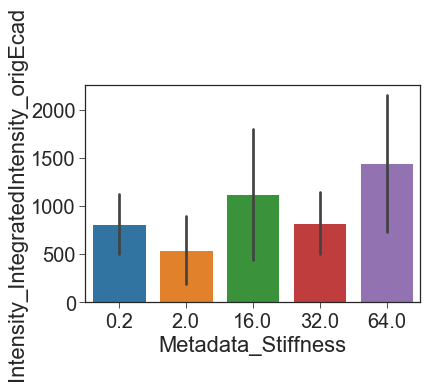

In [64]:
sns.barplot(x='Metadata_Stiffness', y='Intensity_IntegratedIntensity_origEcad', data=df, ci='sd');

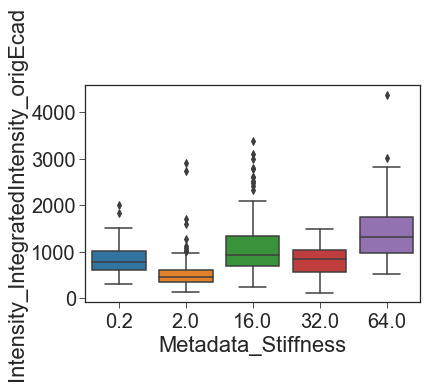

In [65]:
sns.boxplot(x='Metadata_Stiffness', y='Intensity_IntegratedIntensity_origEcad', data=df, showfliers=True);

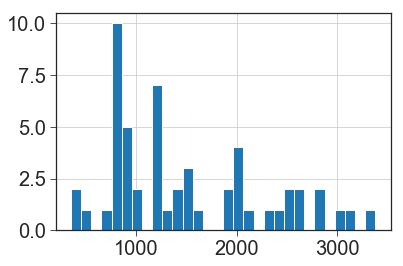

In [68]:
df.loc[(df.Metadata_Stiffness == 16.0)&(df.Metadata_Well == "B6"), 'Intensity_IntegratedIntensity_origEcad'].hist(bins=30);

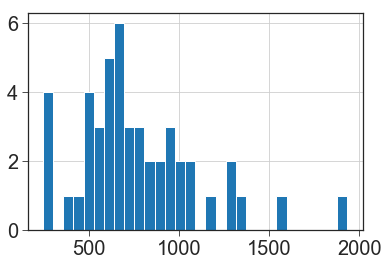

In [70]:
df.loc[(df.Metadata_Stiffness == 16.0)&(df.Metadata_Well == "B4"), 'Intensity_IntegratedIntensity_origEcad'].hist(bins=30);

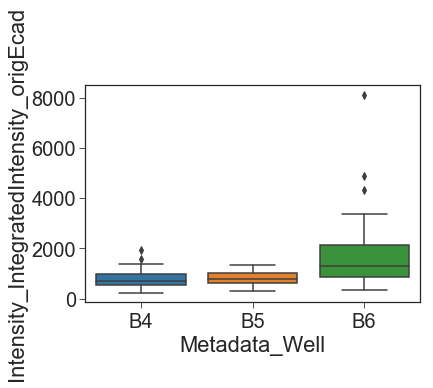

In [60]:
sns.boxplot(x='Metadata_Well', y='Intensity_IntegratedIntensity_origEcad', data=df[df.Metadata_Stiffness == 16.0]);

In [61]:
df.loc[(df.Metadata_Stiffness == 16.0) & (df.Intensity_IntegratedIntensity_origEcad > 4000)]

,ImageNumber,ObjectNumber,Metadata_Combination,Metadata_Combination.1,Metadata_Frame,Metadata_Series,Metadata_Site,Metadata_Site.1,Metadata_Stiffness,Metadata_Stiffness.1,Metadata_Well,Metadata_Well.1,Intensity_IntegratedIntensityEdge_origEcad,Intensity_IntegratedIntensity_origEcad,Intensity_LowerQuartileIntensity_origEcad,Intensity_MADIntensity_origEcad,Intensity_MassDisplacement_origEcad,Intensity_MaxIntensityEdge_origEcad,Intensity_MaxIntensity_origEcad,Intensity_MeanIntensityEdge_origEcad,Intensity_MeanIntensity_origEcad,Intensity_MedianIntensity_origEcad,Intensity_MinIntensityEdge_origEcad,Intensity_MinIntensity_origEcad,Intensity_StdIntensityEdge_origEcad,Intensity_StdIntensity_origEcad,Intensity_UpperQuartileIntensity_origEcad,Location_CenterMassIntensity_X_origEcad,Location_CenterMassIntensity_Y_origEcad,Location_CenterMassIntensity_Z_origEcad,Location_Center_X,Location_Center_Y,Location_Center_Z,Location_MaxIntensity_X_origEcad,Location_MaxIntensity_Y_origEcad,Location_MaxIntensity_Z_origEcad,Number_Object_Number,Parent_Nuclei,Texture_AngularSecondMoment_origEcad_3_00,Texture_AngularSecondMoment_origEcad_3_01,Texture_AngularSecondMoment_origEcad_3_02,Texture_AngularSecondMoment_origEcad_3_03,Texture_Contrast_origEcad_3_00,Texture_Contrast_origEcad_3_01,Texture_Contrast_origEcad_3_02,Texture_Contrast_origEcad_3_03,Texture_Correlation_origEcad_3_00,Texture_Correlation_origEcad_3_01,Texture_Correlation_origEcad_3_02,Texture_Correlation_origEcad_3_03,Texture_DifferenceEntropy_origEcad_3_00,Texture_DifferenceEntropy_origEcad_3_01,Texture_DifferenceEntropy_origEcad_3_02,Texture_DifferenceEntropy_origEcad_3_03,Texture_DifferenceVariance_origEcad_3_00,Texture_DifferenceVariance_origEcad_3_01,Texture_DifferenceVariance_origEcad_3_02,Texture_DifferenceVariance_origEcad_3_03,Texture_Entropy_origEcad_3_00,Texture_Entropy_origEcad_3_01,Texture_Entropy_origEcad_3_02,Texture_Entropy_origEcad_3_03,Texture_InfoMeas1_origEcad_3_00,Texture_InfoMeas1_origEcad_3_01,Texture_InfoMeas1_origEcad_3_02,Texture_InfoMeas1_origEcad_3_03,Texture_InfoMeas2_origEcad_3_00,Texture_InfoMeas2_origEcad_3_01,Texture_InfoMeas2_origEcad_3_02,Texture_InfoMeas2_origEcad_3_03,Texture_InverseDifferenceMoment_origEcad_3_00,Texture_InverseDifferenceMoment_origEcad_3_01,Texture_InverseDifferenceMoment_origEcad_3_02,Texture_InverseDifferenceMoment_origEcad_3_03,Texture_SumAverage_origEcad_3_00,Texture_SumAverage_origEcad_3_01,Texture_SumAverage_origEcad_3_02,Texture_SumAverage_origEcad_3_03,Texture_SumEntropy_origEcad_3_00,Texture_SumEntropy_origEcad_3_01,Texture_SumEntropy_origEcad_3_02,Texture_SumEntropy_origEcad_3_03,Texture_SumVariance_origEcad_3_00,Texture_SumVariance_origEcad_3_01,Texture_SumVariance_origEcad_3_02,Texture_SumVariance_origEcad_3_03,Texture_Variance_origEcad_3_00,Texture_Variance_origEcad_3_01,Texture_Variance_origEcad_3_02,Texture_Variance_origEcad_3_03
347,38,2,C,C,0,0,4,4,16.0,16.0,B6,B6,75.158130,4307.925635,0.014664,0.026604,32.952109,0.462531,0.695262,0.029532,0.058094,0.036065,0.000916,0.000732,0.056681,0.065260,0.081624,444.294976,390.362844,0.0,477.078835,393.688517,0,272.0,287.0,0.0,2,2,0.005008,0.004506,0.004970,0.004242,48.982079,58.286714,37.590474,66.633333,0.912258,0.895527,0.932521,0.879775,3.662504,3.780652,3.549669,3.867468,0.000602,0.000554,0.000632,0.000524,9.315970,9.434792,9.258313,9.539248,-0.240276,-0.221586,-0.252839,-0.201505,0.959923,0.951176,0.965096,0.939180,0.289685,0.270825,0.295453,0.261304,30.580339,30.795465,30.672559,30.759635,6.262719,6.273166,6.266827,6.274007,1067.522154,1057.541246,1076.542564,1041.843672,279.126058,278.956990,278.533260,277.119251
359,39,5,C,C,0,0,5,5,16.0,16.0,B6,B6,26.468620,8106.735835,0.026291,0.043717,13.181302,0.136995,0.862486,0.017921,0.097306,0.067765,0.001144,0.000885,0.020609,0.122185,0.117601,484.468746,333.150417,0.0,471.463271,331.004645,0,553.0,237.0,0.0,5,5,0.002094,0.001840,0.002208,0.002020,90.934840,147.674007,88.109508,120.204500,0.953736,0.925337,0.955114,0.938891,4.03

In [ ]:
df.loc[(df.Intensity_IntegratedIntensity_origEcad > 2000)].shape

In [ ]:
sns.barplot(x='Metadata_Stiffness', y='Intensity_MeanIntensity_origEcad', data=df);

In [ ]:
sns.boxplot(x='Metadata_Stiffness', y='Intensity_MeanIntensity_origEcad', data=df);

In [ ]:
df.loc[df.Metadata_Stiffness == 16.0, 'Intensity_MeanIntensity_origEcad'].hist(bins=25);

In [ ]:
sns.boxplot(x='Metadata_Well', y='Intensity_MeanIntensity_origEcad', data=df[df.Metadata_Stiffness == 16.0]);

In [ ]:
df.loc[(df.Metadata_Stiffness == 16.0) & (df.Intensity_MeanIntensity_origEcad > 0.13)]